KOSMOS-2 MODEL 
The KOSMOS-2 model was proposed in Kosmos-2: Grounding Multimodal Large Language Models to the World by Zhiliang Peng, Wenhui Wang, Li Dong, Yaru Hao, Shaohan Huang, Shuming Ma, Furu Wei.

KOSMOS-2 is a Transformer-based causal language model and is trained using the next-word prediction task on a web-scale dataset of grounded image-text pairs GRIT. The spatial coordinates of the bounding boxes in the dataset are converted to a sequence of location tokens, which are appended to their respective entity text spans (for example, a snowman followed by <patch_index_0044><patch_index_0863>). The data format is similar to “hyperlinks” that connect the object regions in an image to their text span in the corresponding caption.


In [ ]:
INSTALL THE DEPENDENCIES 


In [ ]:
!pip install requests transformers PILLOW

In [2]:
import  requests
from transformers import AutoProcessor , AutoModelForVision2Seq
from PIL import Image

LOAD THE PRE-TRAINED WEIGHTS AND PROCESSOR 

In [3]:
model = AutoModelForVision2Seq.from_pretrained("microsoft/kosmos-2-patch14-224")
processor = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")

config.json:   0%|          | 0.00/4.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.66G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/534 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/191k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.70M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


ADD THE PROMPT (that you want to see before the text which will be generated by model) AND URL (url for your image)

In [36]:
prompt = "<grounding>An image of"
url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/snowman.png"

In [37]:
image = Image.open(requests.get(url, stream=True).raw)
image.save("new_image.jpg")
image = Image.open("new_image.jpg")

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7c24143e3560>

In [7]:
inputs = processor(text=prompt, images=image, return_tensors="pt")

INSTEAD OF GIVING URL FOR THE IMAGE YOU CAN GIVE THE IMAGE PATH AND GENERATED THE RESULTS 

Results are : <grounding> An image of<phrase> a pink blob</phrase><object><patch_index_0616><patch_index_0845></object> on a black background
Results are : <grounding> An image of<phrase> a pink blob</phrase><object><patch_index_0616><patch_index_0845></object> on a black background
Results are: An image of a pink blob on a black background
[('a pink blob', (12, 23), [(0.265625, 0.609375, 0.421875, 0.828125)])]


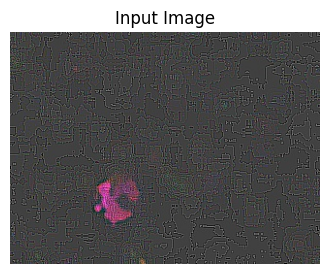

In [33]:
import matplotlib.pyplot as plt
# Define prompt
prompt = "<grounding>An image of"

# Replace URL with the path to your image in Google Drive
image_path = "/content/drive/MyDrive/frame_0061.jpg"

# Open the image directly from the local path
image = Image.open(image_path)

# Process the image
inputs = processor(text=prompt, images=image, return_tensors="pt")

# Generate text from the model
generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)

# Decode and process the generated text
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)

# Print the results
print("Results are :" ,processed_text)
# Define prompt
prompt = "<grounding>An image of"

# Replace URL with the path to your image in Google Drive
image_path = "/content/drive/MyDrive/frame_0061.jpg"

# Open the image directly from the local path
image = Image.open(image_path)

# Process the image
inputs = processor(text=prompt, images=image, return_tensors="pt")

# Generate text from the model
generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)

# Decode and process the generated text
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)
# Print the results
print("Results are :" ,processed_text)
processed_text ,entities = processor.post_process_generation(generated_text)
print("Results are:",processed_text)
print(entities)
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis('off')  # Hide axes for better visual appeal
plt.title("Input Image")
plt.show()

Results are : <grounding> An image of<phrase> a galaxy</phrase><object><patch_index_0364><patch_index_1011></object> with<phrase> a green blob</phrase><object><patch_index_0365><patch_index_0754></object> and<phrase> a lot</phrase><object><patch_index_0000><patch_index_1023></object> of stars
Results are: An image of a galaxy with a green blob and a lot of stars
[('a galaxy', (12, 20), [(0.390625, 0.359375, 0.609375, 0.984375)]), ('a green blob', (26, 38), [(0.421875, 0.359375, 0.578125, 0.734375)]), ('a lot', (43, 48), [(0.015625, 0.015625, 0.984375, 0.984375)])]


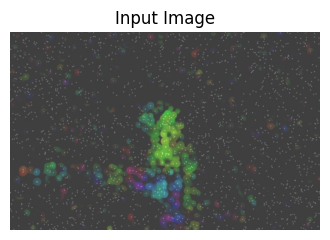

In [30]:
# Define prompt
prompt = "<grounding>An image of"

# Replace URL with the path to your image in Google Drive
image_path = "/content/drive/MyDrive/frame_0164.jpg"

# Open the image directly from the local path
image = Image.open(image_path)

# Process the image
inputs = processor(text=prompt, images=image, return_tensors="pt")

# Generate text from the model
generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)

# Decode and process the generated text
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)

# Print the results
print("Results are :" ,processed_text)
processed_text ,entities = processor.post_process_generation(generated_text)
print("Results are:",processed_text)
print(entities)
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis('off')  # Hide axes for better visual appeal
plt.title("Input Image")
plt.show()

Results are : <grounding> An image of<phrase> a galaxy</phrase><object><patch_index_0261><patch_index_1013></object> with<phrase> a blue and green blob</phrase><object><patch_index_0237><patch_index_0303></object> and<phrase> a few red dots</phrase><object><patch_index_0206><patch_index_0271></delimiter_of_multi_objects/><patch_index_0279><patch_index_0344></delimiter_of_multi_objects/><patch_index_0312><patch_index_0377></object>
Results are: An image of a galaxy with a blue and green blob and a few red dots
[('a galaxy', (12, 20), [(0.171875, 0.265625, 0.671875, 0.984375)]), ('a blue and green blob', (26, 47), [(0.421875, 0.234375, 0.484375, 0.296875)]), ('a few red dots', (52, 66), [(0.453125, 0.203125, 0.484375, 0.265625), (0.734375, 0.265625, 0.765625, 0.328125), (0.765625, 0.296875, 0.796875, 0.359375)])]


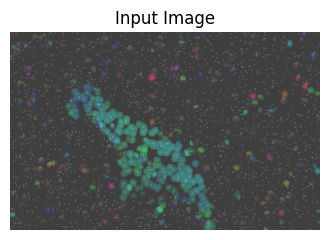

In [34]:
# Define prompt
prompt = "<grounding>An image of"

# Replace URL with the path to your image in Google Drive
image_path = "/content/drive/MyDrive/frame_0164mammal.jpg"

# Open the image directly from the local path
image = Image.open(image_path)

# Process the image
inputs = processor(text=prompt, images=image, return_tensors="pt")

# Generate text from the model
generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)

# Decode and process the generated text
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)
# Print the results
print("Results are :" ,processed_text)
processed_text ,entities = processor.post_process_generation(generated_text)
print("Results are:",processed_text)
print(entities)
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis('off')  # Hide axes for better visual appeal
plt.title("Input Image")
plt.show()

Results are : <grounding> An image of<phrase> a galaxy</phrase><object><patch_index_0000><patch_index_1023></object> with<phrase> a few clusters of galaxies</phrase><object><patch_index_0073><patch_index_0656></object>
Results are: An image of a galaxy with a few clusters of galaxies
[('a galaxy', (12, 20), [(0.015625, 0.015625, 0.984375, 0.984375)]), ('a few clusters of galaxies', (26, 52), [(0.296875, 0.078125, 0.515625, 0.640625)])]


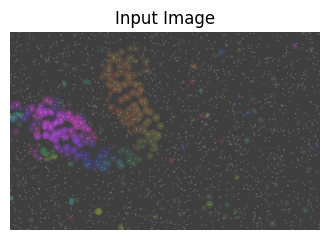

In [35]:
# Define prompt
prompt = "<grounding>An image of"

# Replace URL with the path to your image in Google Drive
image_path = "/content/drive/MyDrive/frame_0003.jpg"

# Open the image directly from the local path
image = Image.open(image_path)

# Process the image
inputs = processor(text=prompt, images=image, return_tensors="pt")

# Generate text from the model
generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)

# Decode and process the generated text
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)
# Print the results
print("Results are :" ,processed_text)
processed_text ,entities = processor.post_process_generation(generated_text)
print("Results are:",processed_text)
print(entities)
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis('off')  # Hide axes for better visual appeal
plt.title("Input Image")
plt.show()